# Week 7 Practice

## Logistic Regression

### Question 1

Try different thresholds for computing predictions. By default it is 0.5. Use predict_proba function to compute probabilities and then try custom thresholds and see their impact on Accuracy, Precision and Recall.

### Question 2

Do the same analysis for other columns

### Question 3

Fit a Logistic Regression Model on all features. Remember to preprocess data(eg. normalization and one hot encoding)

### Question 4

Plot ROC Curves for each model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
glass = pd.read_csv('glass.csv')

In [3]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
glass.Type.value_counts().sort_index()

Type
1    70
2    76
3    17
5    13
6     9
7    29
Name: count, dtype: int64

In [5]:
glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.household.value_counts()

household
0    163
1     51
Name: count, dtype: int64

In [6]:
glass.sort_values( by = 'Al', inplace=True)
X = np.array(glass.Al).reshape(-1,1)
y = glass.household

In [7]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X,y)
pred = logreg.predict(X)
logreg.coef_, logreg.intercept_

(array([[3.11517927]]), array([-6.00934605]))

Text(0, 0.5, 'household')

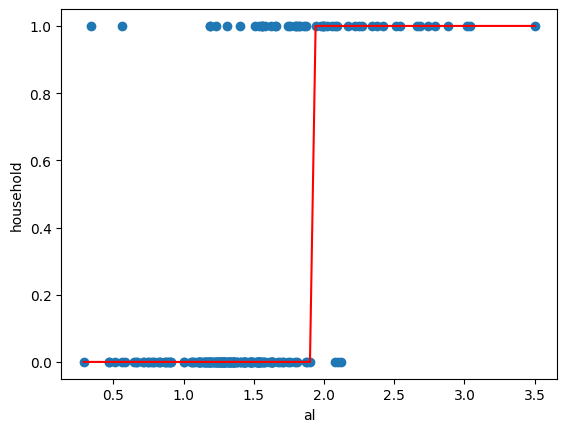

In [8]:
glass.sort_values( by = 'Al', inplace=True)
# Plot the class predictions.

plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [8]:
# Store the predicted probabilities of class 1.
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

In [9]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,household,household_pred_prob
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.00,0.00,1,0,0.006024
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6,1,0.007032
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,0,0.010506
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,0,0.010506
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.00,0.16,1,0,0.011884
...,...,...,...,...,...,...,...,...,...,...,...,...
192,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09,7,1,0.935956
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7,1,0.950845
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5,1,0.967657
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5,1,0.969552


Text(0, 0.5, 'household')

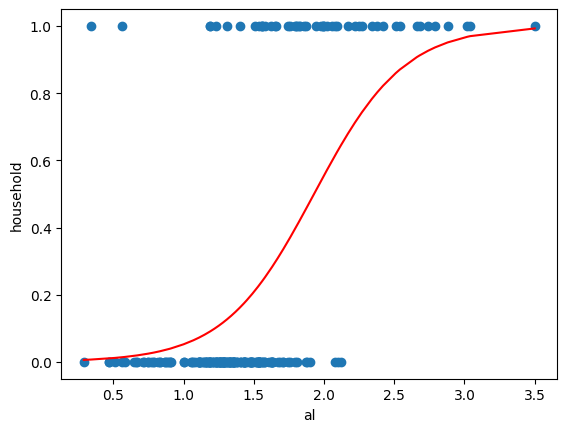

In [10]:
# Plot the predicted probabilities.
plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve

In [12]:
accuracy_score(y_true=y, y_pred=pred)

0.8691588785046729

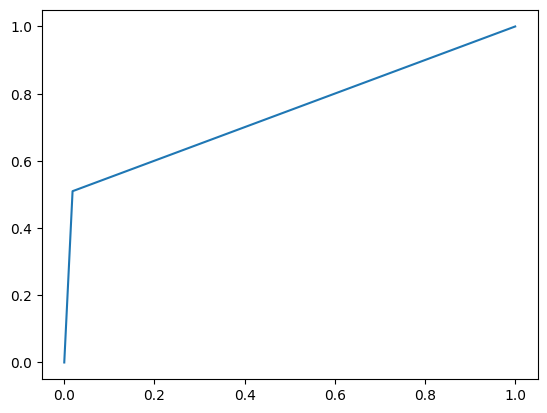

In [13]:
fpr, tpr, thresholds = roc_curve(y, pred)
plt.plot(fpr, tpr,  label = 'Threshold = 0.5')

Checking for a range of values of threshold:

In [14]:
# Threshold is 0.25
y_pred_1 = (glass.household_pred_prob >= 0.25).astype(int)

Text(0, 0.5, 'household')

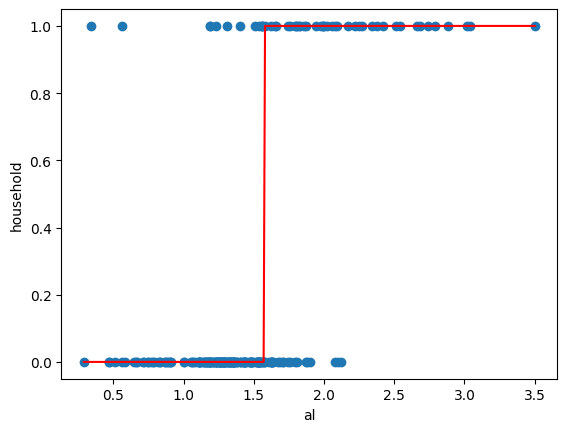

In [15]:
plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, y_pred_1, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [16]:
accuracy_score(y_true=y, y_pred=y_pred_1)

0.8411214953271028

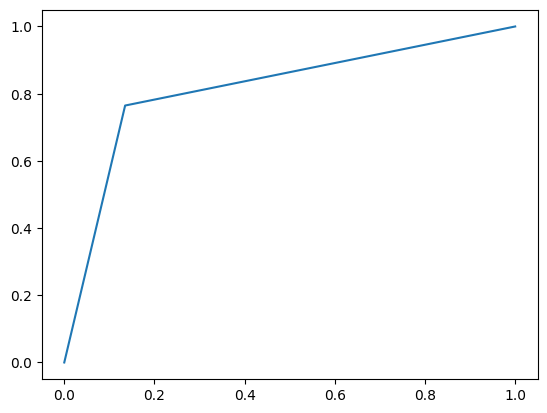

In [17]:
fpr, tpr, thresholds = roc_curve(y, y_pred_1)
plt.plot(fpr, tpr,  label = 'Threshold = 0.25')

We get worse accuracy then previous case...

In [18]:
# Threshold is 0.6
y_pred_2 = (glass.household_pred_prob >= 0.6).astype(int)

Text(0, 0.5, 'household')

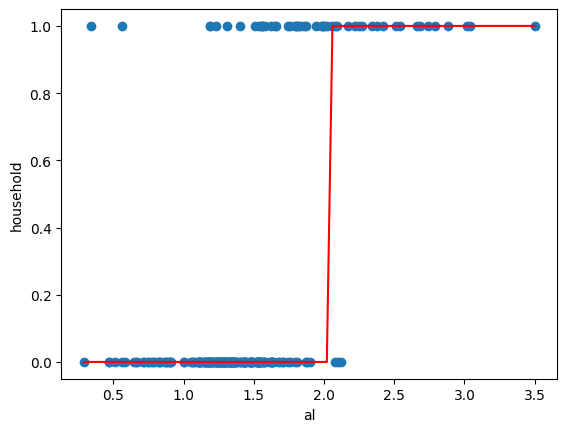

In [19]:
plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, y_pred_2, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [20]:
accuracy_score(y_true=y, y_pred=y_pred_2)

0.8411214953271028

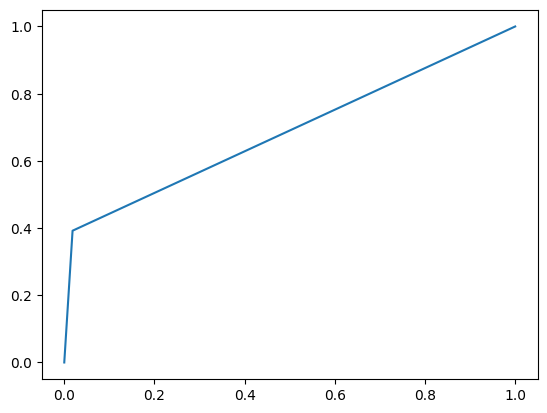

In [21]:
fpr, tpr, thresholds = roc_curve(y, y_pred_2)
plt.plot(fpr, tpr,  label = 'Threshold = 0.6')

We get bad accuracy here as well...

In [21]:
# Running for a ragne of values between 0.25 to 0.6 to get an optimum value

In [22]:
thresholds = [0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
accuracies = []

for threshold in thresholds:
    prediction = (glass.household_pred_prob >= threshold).astype(int)
    accuracy = accuracy_score(y_true=y, y_pred=prediction)
    accuracies.append(accuracy)

Text(0, 0.5, 'Accuracy')

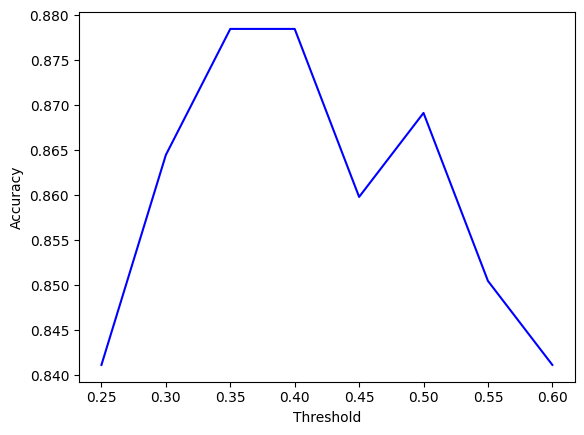

In [23]:
plt.plot(thresholds, accuracies, color='blue')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')

In [24]:
max(accuracies)

0.8785046728971962

We get max accuracy at threshold 0.35

In [25]:
y_pred_3 = (glass.household_pred_prob >= 0.35).astype(int)

Text(0, 0.5, 'household')

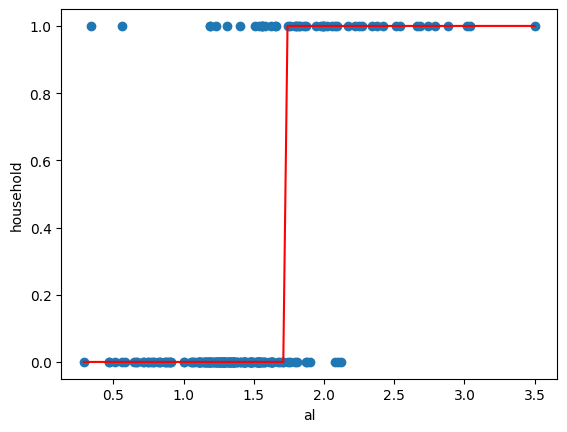

In [26]:
plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, y_pred_3, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [27]:
accuracy_score(y_true=y, y_pred=y_pred_3)

0.8785046728971962

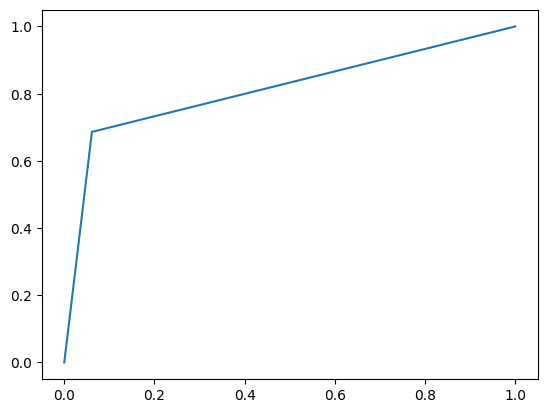

In [28]:
fpr, tpr, thresholds = roc_curve(y, y_pred_3)
plt.plot(fpr, tpr,  label = 'Threshold = 0.35')

In [29]:
precision_score(y_true=y, y_pred=y_pred_3)

0.7777777777777778

In [30]:
recall_score(y,y_pred_3)

0.6862745098039216

Text(0, 0.5, 'household')

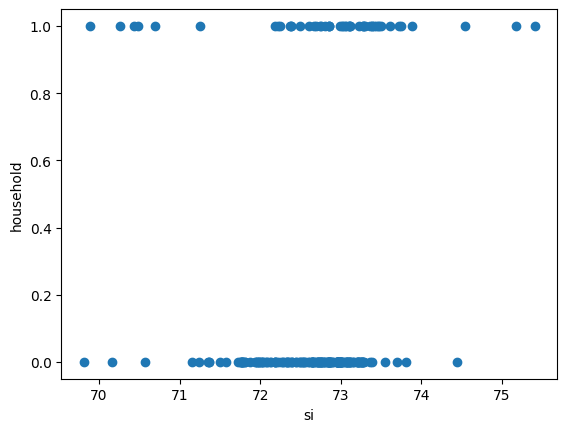

In [31]:
glass.sort_values( by = 'Si', inplace=True)
# Plot the class predictions.

plt.scatter(glass.Si, glass.household)
plt.xlabel('si')
plt.ylabel('household')

Text(0, 0.5, 'household')

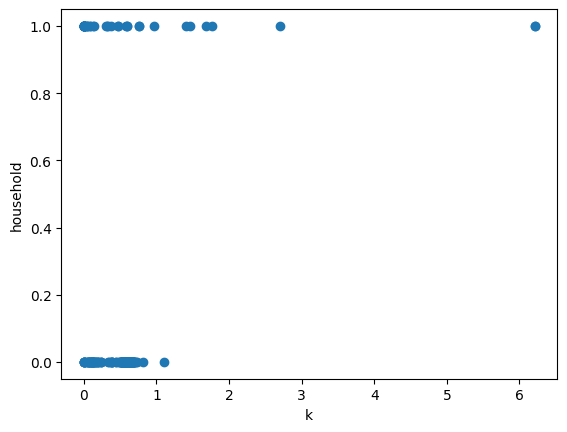

In [32]:
glass.sort_values( by = 'K', inplace=True)
# Plot the class predictions.

plt.scatter(glass.K, glass.household)
plt.xlabel('k')
plt.ylabel('household')

Text(0, 0.5, 'household')

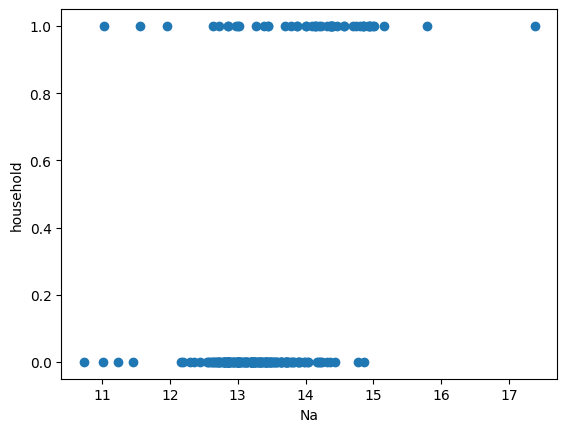

In [33]:
glass.sort_values( by = 'Na', inplace=True)
# Plot the class predictions.

plt.scatter(glass.Na, glass.household)
plt.xlabel('Na')
plt.ylabel('household')

Text(0, 0.5, 'household')

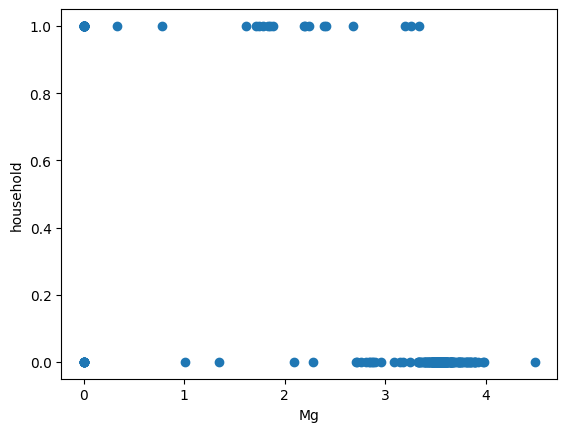

In [34]:
glass.sort_values( by = 'Mg', inplace=True)
# Plot the class predictions.

plt.scatter(glass.Mg, glass.household)
plt.xlabel('Mg')
plt.ylabel('household')

Text(0, 0.5, 'household')

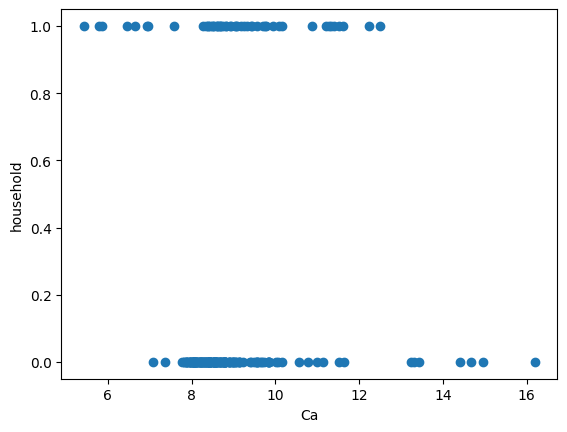

In [35]:
glass.sort_values( by = 'Ca', inplace=True)
# Plot the class predictions.

plt.scatter(glass.Ca, glass.household)
plt.xlabel('Ca')
plt.ylabel('household')

Text(0, 0.5, 'household')

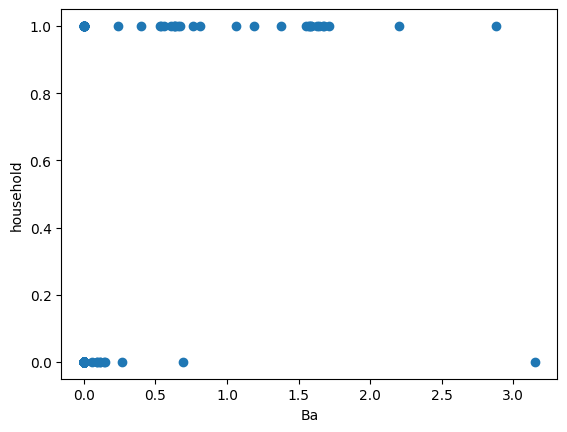

In [36]:
glass.sort_values( by = 'Ba', inplace=True)
# Plot the class predictions.

plt.scatter(glass.Ba, glass.household)
plt.xlabel('Ba')
plt.ylabel('household')

Text(0, 0.5, 'household')

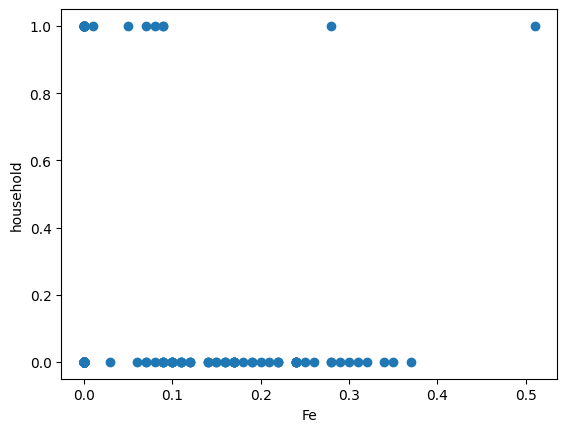

In [37]:
glass.sort_values( by = 'Fe', inplace=True)
# Plot the class predictions.

plt.scatter(glass.Fe, glass.household)
plt.xlabel('Fe')
plt.ylabel('household')

Text(0, 0.5, 'household')

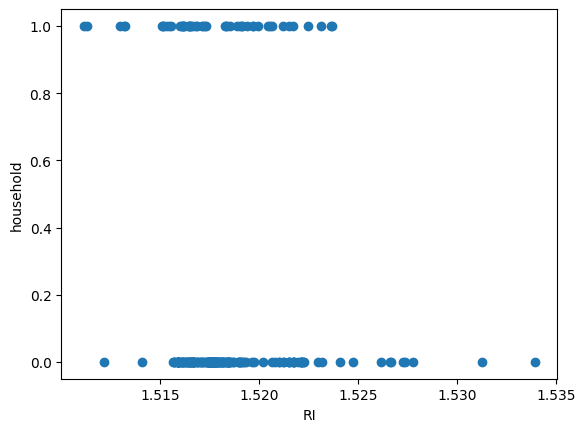

In [39]:
glass.sort_values( by = 'RI', inplace=True)
# Plot the class predictions.

plt.scatter(glass.RI, glass.household)
plt.xlabel('RI')
plt.ylabel('household')

Running the logistic regression on all features...

In [40]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,household,household_pred_prob
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6,1,0.007032
185,1.51131,13.69,3.20,1.81,72.81,1.76,5.43,1.19,0.00,7,1,0.408330
56,1.51215,12.99,3.47,1.12,72.98,0.62,8.35,0.00,0.31,1,0,0.074444
180,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.00,0.00,6,1,0.229353
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5,1,0.969552


In [59]:
columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

In [60]:
X = glass[columns].to_numpy()

In [62]:
y = glass.household

In [63]:
logreg = LogisticRegression()
logreg.fit(X,y)
pred = logreg.predict(X)
logreg.coef_, logreg.intercept_

/Users/rugvedmhatre/Documents/1_Projects/coding-projects/active/python-projects/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(array([[-0.02356363,  0.46381249, -1.9574153 ,  1.57956747,  0.02292436,
         -0.1995079 , -0.73414924,  0.0807986 , -0.56318245]]),
 array([-0.04214057]))

In [64]:
accuracy_score(y_true=y, y_pred=pred)

0.9345794392523364

In [65]:
precision_score(y_true=y, y_pred=pred)

0.8775510204081632

In [66]:
recall_score(y,pred)

0.8431372549019608

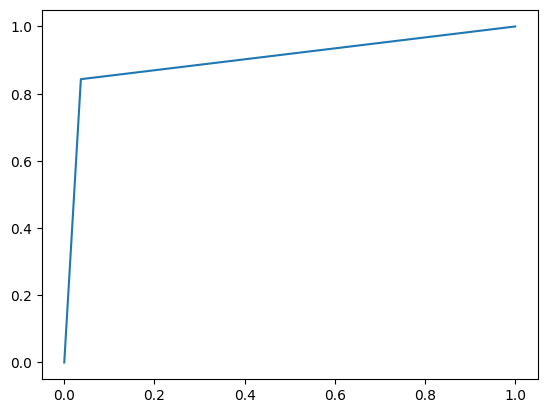

In [67]:
fpr, tpr, thresholds = roc_curve(y, pred)
plt.plot(fpr, tpr)

In [68]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y, pred)

0.9031637194755203

## Clustering

### Question 1

Repeat the above exercise for different values of k

 - How do the inertia and silhouette scores change?

 - What if you don't scale your features?

 - Is there a 'right' k? Why or why not?


### Question 2

Repeat the following exercise for food nutrients dataset

In [70]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets, preprocessing, metrics
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [71]:
# Check out the dataset and our target values
df = pd.read_csv("iris.csv")
print(df['Name'].value_counts())
df.head(5)

Name
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


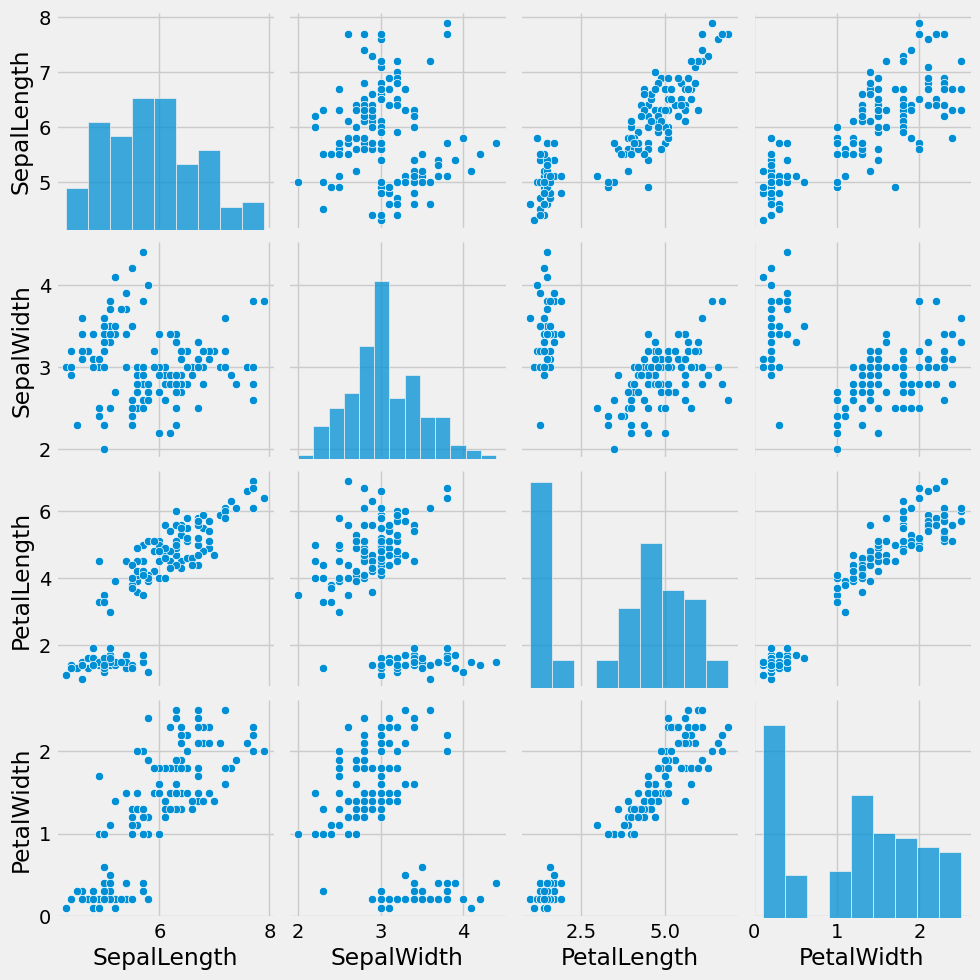

In [72]:
cols = df.columns[:-1]
sns.pairplot(df[cols])

In [73]:
X_scaled = preprocessing.MinMaxScaler().fit_transform(df[cols])

In [74]:
pd.DataFrame(X_scaled, columns=cols).describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [75]:
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)

/Users/rugvedmhatre/Documents/1_Projects/coding-projects/active/python-projects/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [76]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

In [77]:
metrics.silhouette_score(X_scaled, labels, metric='euclidean')

0.5043188549150883

In [78]:
df['label'] = labels
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


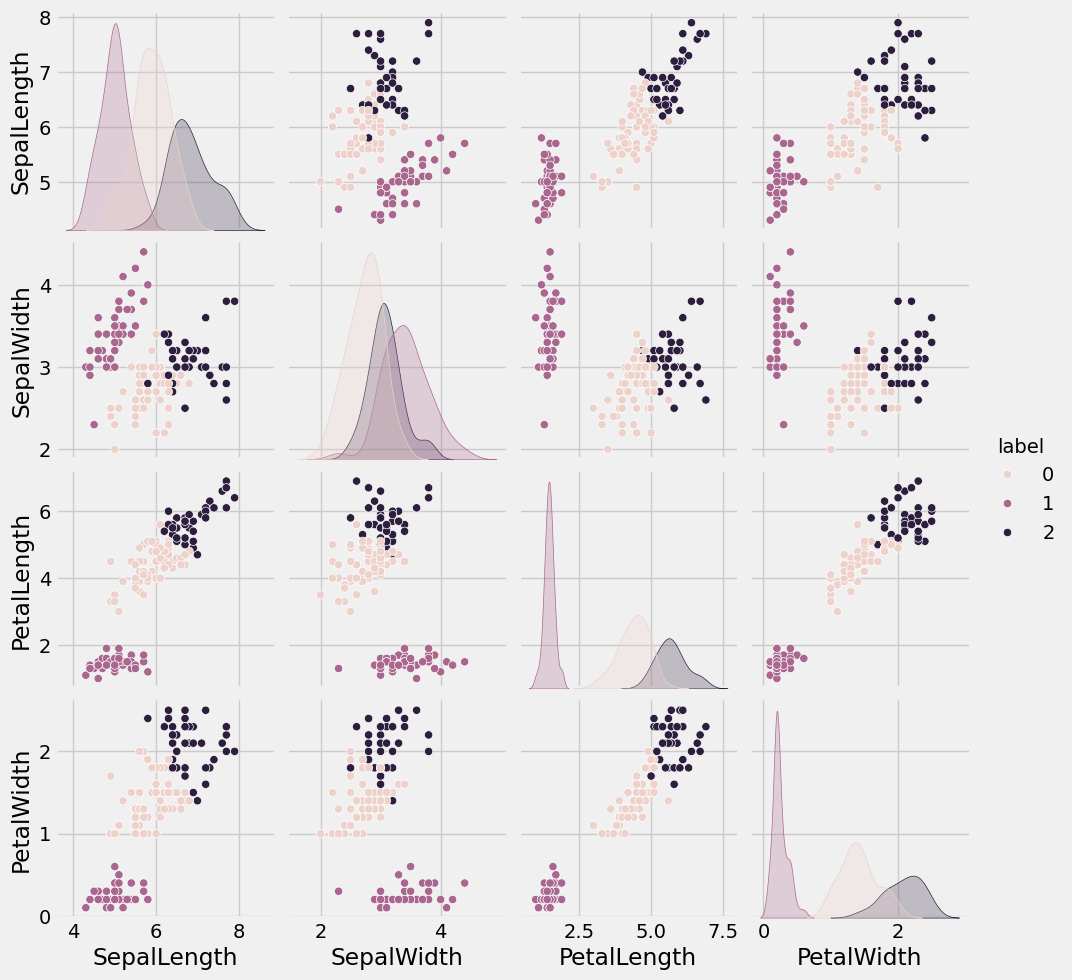

In [79]:
cols = df.columns[:-2]
sns.pairplot(df, x_vars=cols, y_vars= cols, hue='label')

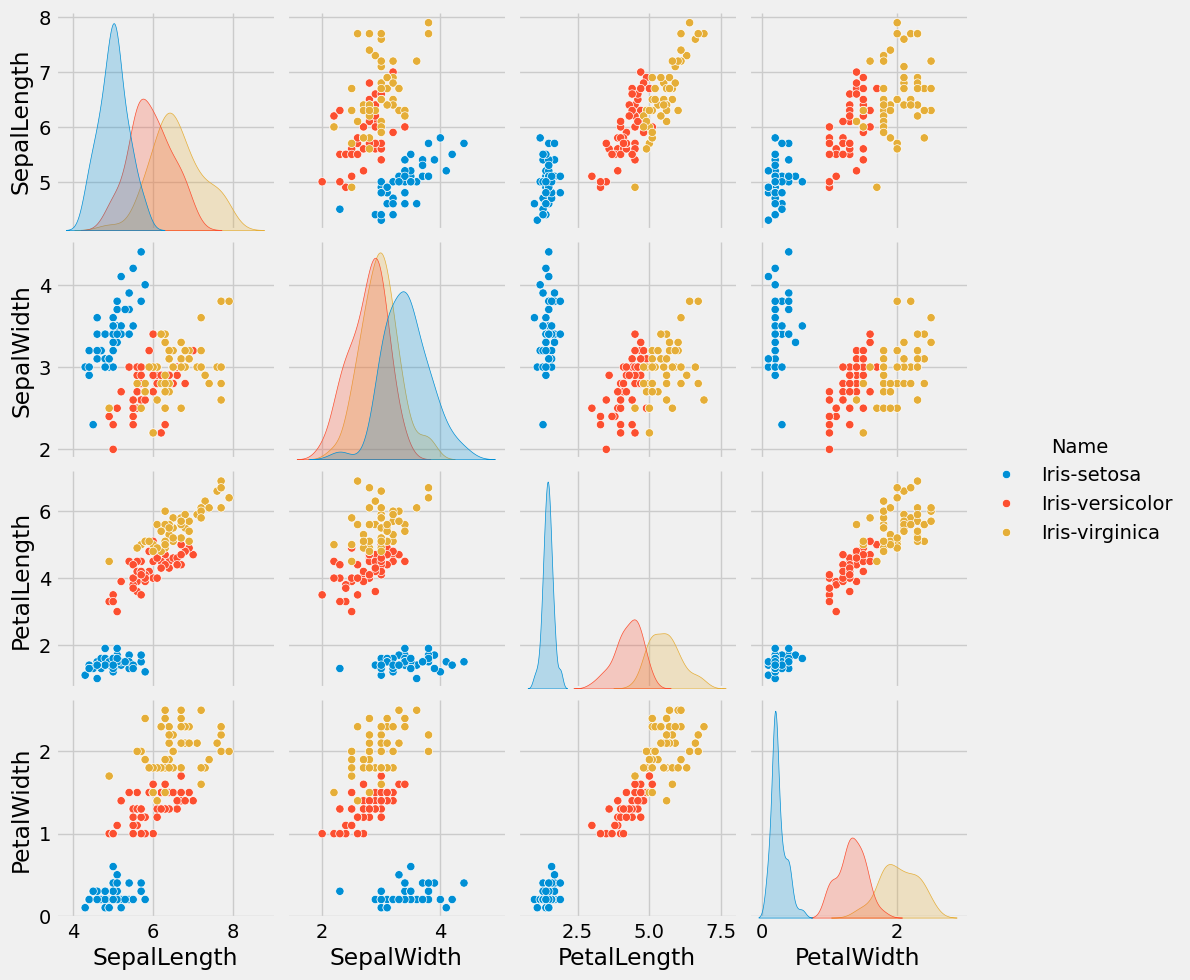

In [80]:
sns.pairplot(df, x_vars=cols, y_vars= cols, hue='Name')

In [149]:
# Check out the dataset and our target values
nutrients = pd.read_fwf("nutrients.txt")

In [150]:
nutrients.head(5)

,"""Name""","""Energy""","""Protein""","""Fat"" ""Calcium""","""Iron"""
0,"""Braised beef""",340,20,28 9,2.6
1,"""Hamburger""",245,21,17 9,2.7
2,"""Roast beef""",420,15,39 7,2.0
3,"""Beefsteak""",375,19,32 9,2.6
4,"""Canned beef""",180,22,10 17,3.7


In [151]:
nutrients.columns

Index(['"Name"', '"Energy"', '"Protein"', '"Fat" "Calcium"', '"Iron"'], dtype='object')

In [152]:
nutrients[['Fat']] = nutrients[['"Fat" "Calcium"']].map(lambda values : values.split()[0])

In [153]:
nutrients[['Calcium']] = nutrients[['"Fat" "Calcium"']].map(lambda values : values.split()[1])

In [154]:
nutrients = nutrients.drop(columns = ['"Fat" "Calcium"'])

In [155]:
nutrients = nutrients.rename(columns={'"Name"': 'Name', '"Energy"': 'Energy', '"Protein"': 'Protein', '"Iron"': 'Iron'})

In [162]:
nutrients['Name'] = nutrients['Name'].str.replace('"', '')

In [163]:
nutrients

,Name,Energy,Protein,Iron,Fat,Calcium
0,Braised beef,340,20,2.6,28,9
1,Hamburger,245,21,2.7,17,9
2,Roast beef,420,15,2.0,39,7
3,Beefsteak,375,19,2.6,32,9
4,Canned beef,180,22,3.7,10,17
5,Broiled chicken,115,20,1.4,3,8
6,Canned chicken,170,25,1.5,7,12
7,Beef heart,160,26,5.9,5,14
8,Roast lamb leg,265,20,2.6,20,9
9,Roast lamb shoulder,300,18,2.3,25,9


In [176]:
nutrients.dtypes

Name        object
Energy       int64
Protein      int64
Iron       float64
Fat         object
Calcium     object
dtype: object

In [177]:
nutrients['Fat'] = nutrients['Fat'].astype(int)

In [178]:
nutrients['Calcium'] = nutrients['Calcium'].astype(int)

In [179]:
nutrients.dtypes

Name        object
Energy       int64
Protein      int64
Iron       float64
Fat          int64
Calcium      int64
dtype: object

In [180]:
nutrients

,Name,Energy,Protein,Iron,Fat,Calcium
0,Braised beef,340,20,2.6,28,9
1,Hamburger,245,21,2.7,17,9
2,Roast beef,420,15,2.0,39,7
3,Beefsteak,375,19,2.6,32,9
4,Canned beef,180,22,3.7,10,17
5,Broiled chicken,115,20,1.4,3,8
6,Canned chicken,170,25,1.5,7,12
7,Beef heart,160,26,5.9,5,14
8,Roast lamb leg,265,20,2.6,20,9
9,Roast lamb shoulder,300,18,2.3,25,9


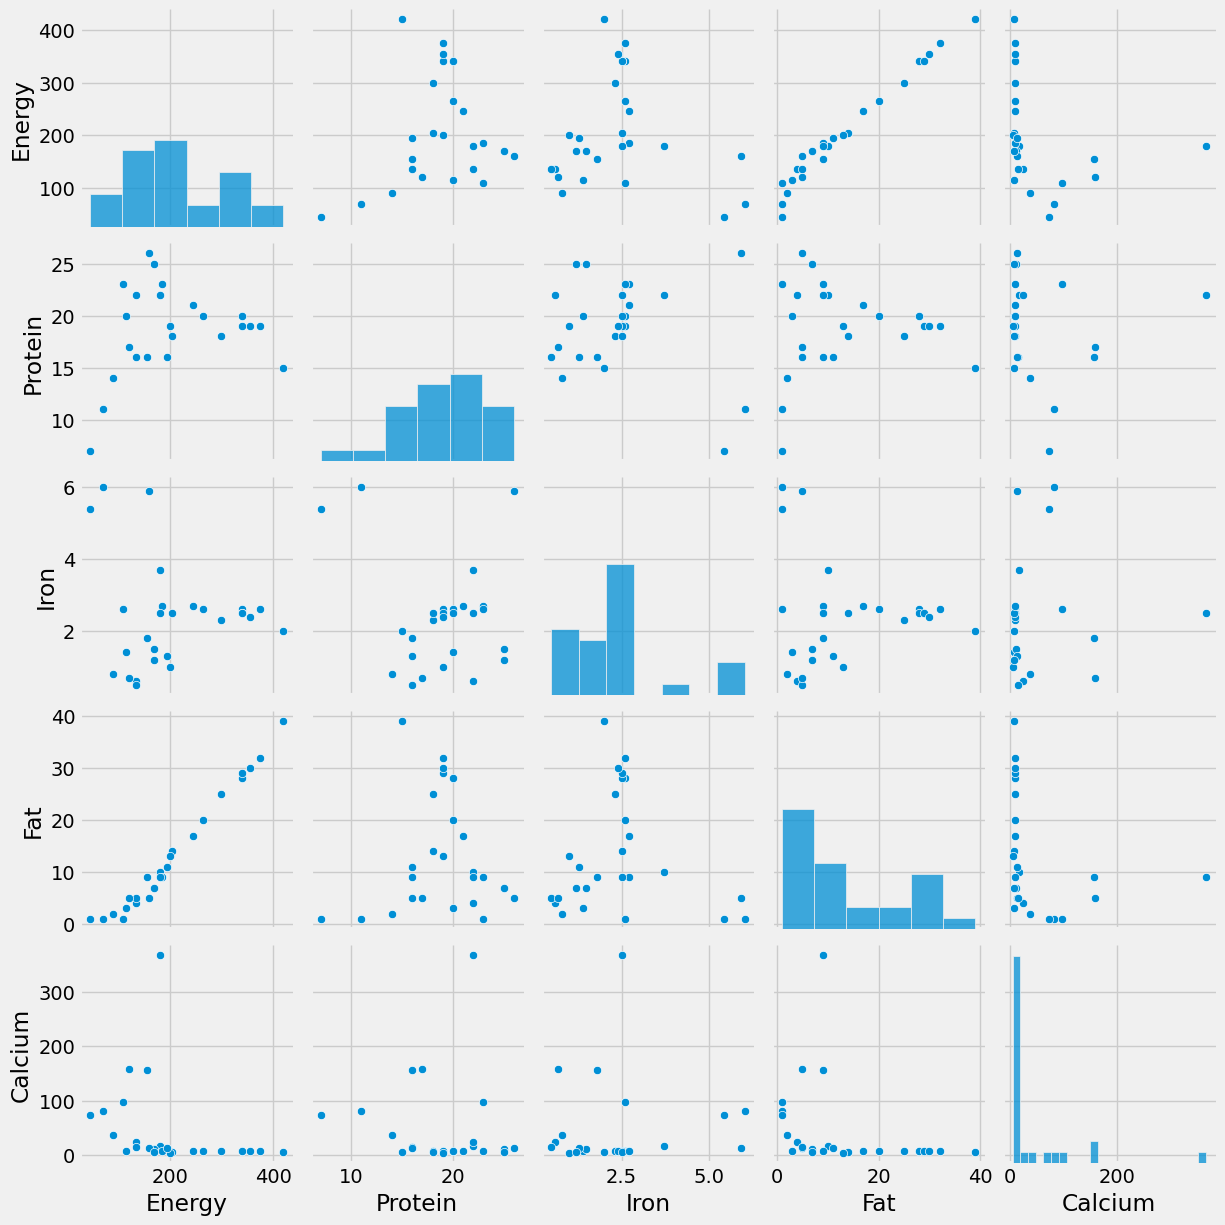

In [181]:
cols = nutrients.columns[1:]
sns.pairplot(nutrients[cols])

In [182]:
X_scaled = preprocessing.MinMaxScaler().fit_transform(nutrients[cols])

In [183]:
pd.DataFrame(X_scaled, columns=cols).describe()

,Energy,Protein,Iron,Fat,Calcium
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.433086,0.631579,0.342088,0.328460,0.107632
std,0.269887,0.223773,0.265692,0.296238,0.215564
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240000,0.500000,0.154545,0.105263,0.011050
50%,0.360000,0.631579,0.363636,0.210526,0.011050
75%,0.633333,0.789474,0.381818,0.565789,0.073204
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [184]:
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)

/Users/rugvedmhatre/Documents/1_Projects/coding-projects/active/python-projects/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [185]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

In [186]:
metrics.silhouette_score(X_scaled, labels, metric='euclidean')

0.4331001453059117

In [187]:
nutrients['label'] = labels
nutrients.head()

,Name,Energy,Protein,Iron,Fat,Calcium,label
0,Braised beef,340,20,2.6,28,9,0
1,Hamburger,245,21,2.7,17,9,0
2,Roast beef,420,15,2.0,39,7,0
3,Beefsteak,375,19,2.6,32,9,0
4,Canned beef,180,22,3.7,10,17,1


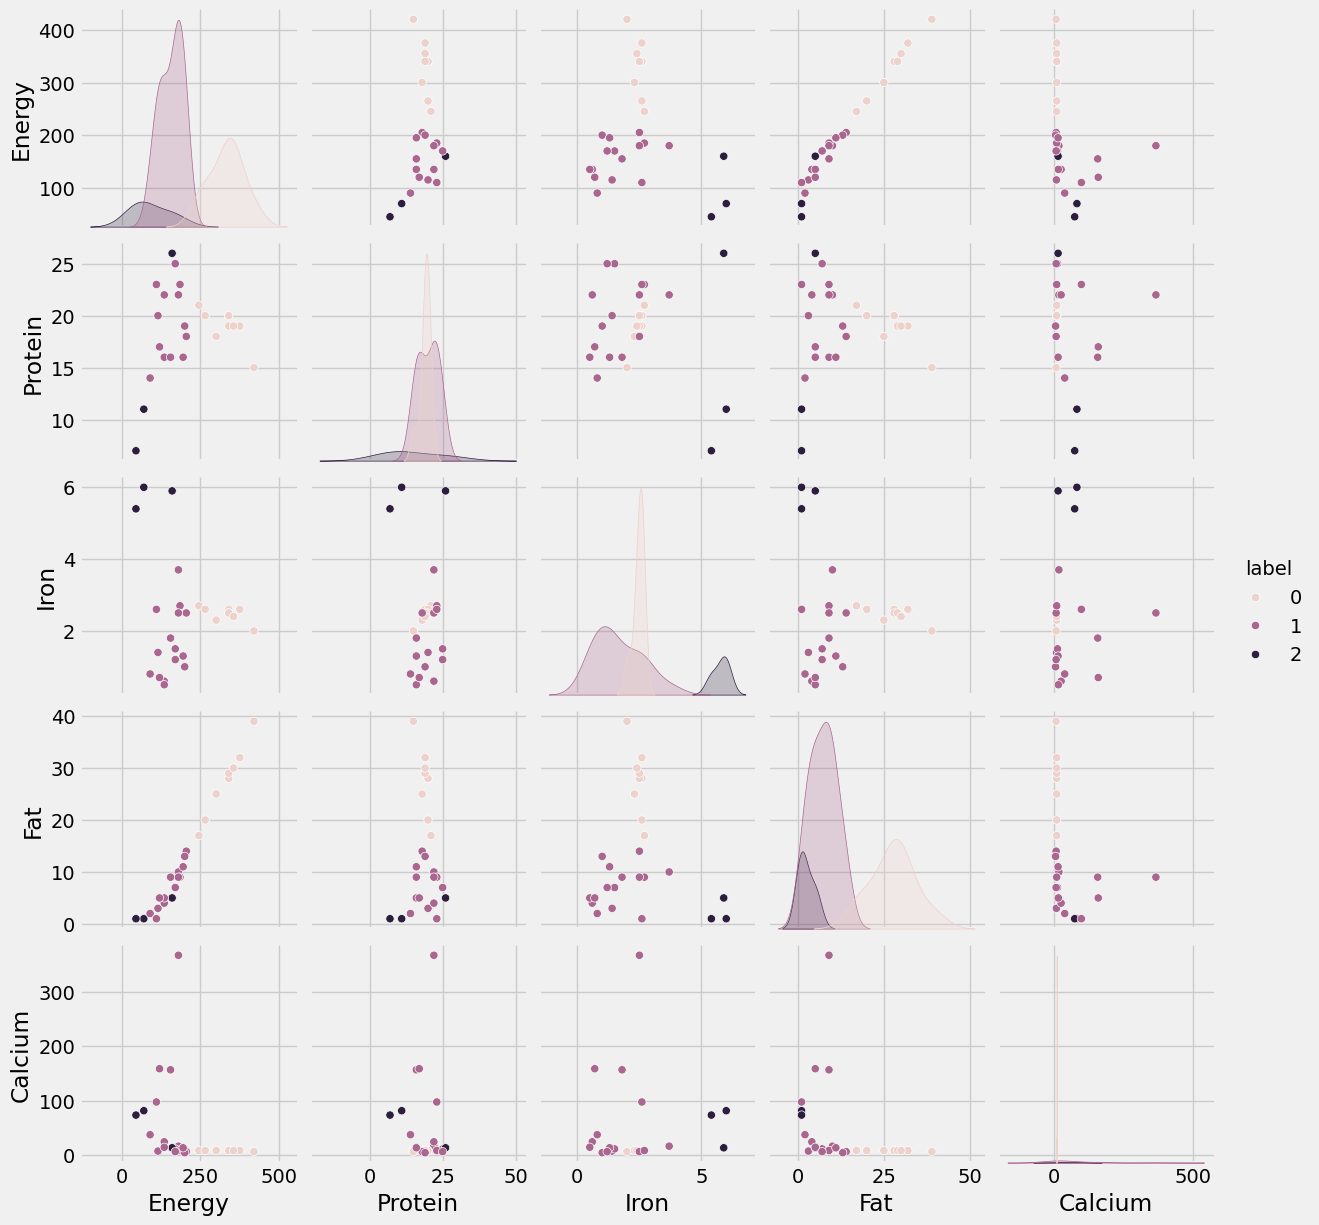

In [188]:
cols = nutrients.columns[1:-1]
sns.pairplot(nutrients, x_vars=cols, y_vars= cols, hue='label')